In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(123)

In [28]:
x = np.linspace(-5,5,11)
print(x)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [29]:
error = np.random.normal(0,1,11) # create some errors
print(error)

[ 0.33858905 -0.01183049  2.39236527  0.41291216  0.97873601  2.23814334
 -1.29408532 -1.03878821  1.74371223 -0.79806274  0.02968323]


In [30]:
y = 2*x + error
sd = np.ones(11)

<Container object of 3 artists>

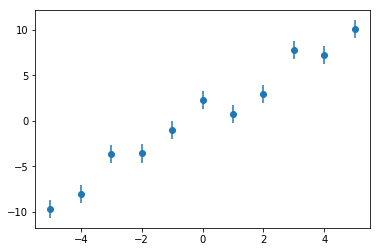

In [31]:
plt.errorbar(x,y,yerr=sd,fmt="o")

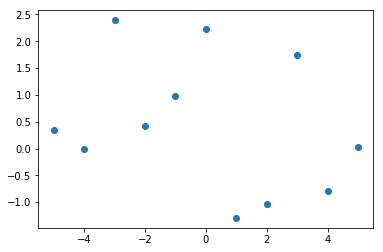

In [32]:
res = y - 2*x
plt.plot(x,res,"o")

In [33]:
p = np.polyfit(x,y,1)
print(p)

[ 1.89262146  0.45376132]


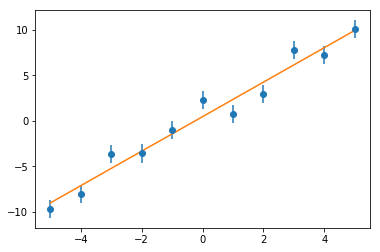

In [34]:
yfit = p[1] +p[0]*x
plt.errorbar(x,y,yerr=sd,fmt="o")
plt.plot(x,yfit)

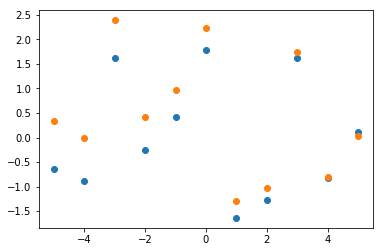

In [35]:
resfit = y - yfit
plt.plot(x,resfit,"o")
plt.plot(x,res,"o")

In [36]:
y2 = 2*x + 0.1*x**2 + np.random.normal(0,1,11)

In [40]:
p1 = np.polyfit(x,y2,1)
print(p1)

[ 1.89922949  1.68314922]


In [41]:
p2 = np.polyfit(x,y2,2)
print(p2)

[ 0.12524125  1.89922949  0.43073673]


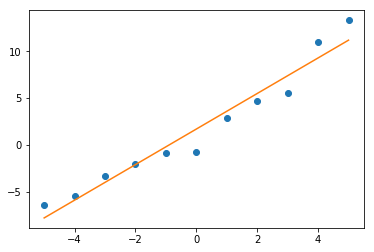

In [46]:
y2fit = p1[1] + p1[0]*x
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

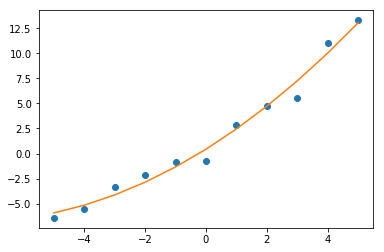

In [45]:
y2fit = p2[2] + p2[1]*x + p2[0]*x**2
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

In [47]:
chisq_list = []
for i in range(1000):
    y=2*x +np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))

(array([ 0.00898443,  0.03185389,  0.06044072,  0.06860839,  0.10536288,
         0.12006468,  0.10699642,  0.08167665,  0.06452456,  0.05145629,
         0.02777006,  0.0294036 ,  0.02041916,  0.01306826,  0.01061796,
         0.00653413,  0.00653413,  0.        ,  0.00163353,  0.00081677]),
 array([  0.84646471,   2.07080479,   3.29514487,   4.51948494,
          5.74382502,   6.9681651 ,   8.19250518,   9.41684525,
         10.64118533,  11.86552541,  13.08986548,  14.31420556,
         15.53854564,  16.76288572,  17.98722579,  19.21156587,
         20.43590595,  21.66024603,  22.8845861 ,  24.10892618,  25.33326626]),
 <a list of 20 Patch objects>)

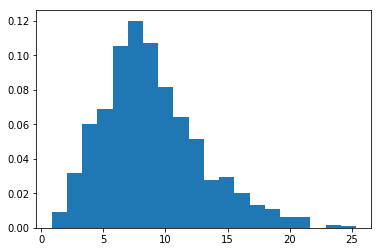

In [49]:
plt.hist(chisq_list,bins=20,normed=True)